In [19]:
import numpy as np
import scipy as sp
import os 
import sys
import importlib
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfileu
import my_cluster_utils as mclusteru
import my_meal_detection_utils as mmdu
import my_data_process_utils as mdpu
import my_steven_free_utils as msfreeu
importlib.reload(mclusteru)

<module 'my_cluster_utils' from 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils\\my_cluster_utils.py'>

In [10]:
annots = mfileu.read_file('data', 'free_annots_steven_processed.pkl')

In [11]:
RF_our = 'RF'
all_proba_rf = mfileu.read_file('all_proba2', 'all_proba_bite_free_{}.pkl'.format(RF_our))
pct_proba_rf = mfileu.read_file('pct_proba2', 'pct_proba_bite_free_{}.pkl'.format(RF_our))
all_bf_percentile_rf = mfileu.read_file('all_bites_frames_free', 'all_bites_frames_percentile_{}.pkl'.format(RF_our))
all_bf_proba_rf = mfileu.read_file('all_bites_frames_free', 'all_bites_frames_proba_{}.pkl'.format(RF_our))

In [12]:
RF_our = 'our'
all_proba_our = mfileu.read_file('all_proba2', 'all_proba_bite_free_{}.pkl'.format(RF_our))
pct_proba_our = mfileu.read_file('pct_proba2', 'pct_proba_bite_free_{}.pkl'.format(RF_our))
all_bf_percentile_our = mfileu.read_file('all_bites_frames_free', 'all_bites_frames_percentile_{}.pkl'.format(RF_our))
all_bf_proba_our = mfileu.read_file('all_bites_frames_free', 'all_bites_frames_proba_{}.pkl'.format(RF_our))

In [15]:
def get_results(all_bites, minDuration=30*16, minCount=3,  mergeDistance=5*60*16):    
    gts, acovs, clcovs = [], [], []
    pos_bite_detected, neg_bite_detected = 0, 0
    
    for subj in range(len(annots)):
        for sess in range(len(annots[subj])):            
            a = annots[subj][sess]
            
            bites = all_bites[subj][sess]            
            clusters1 = mclusteru.cluster_bites_by_minute(bites)
            clusters2 = mclusteru.filter_clusters(clusters1, minDuration, minCount)            
            clusters = mclusteru.merge_clusters(clusters2, mergeDistance)
            #print(len(bites), len(clusters1), len(clusters2), len(clusters))
            
            gt, ac, clc = mmdu.get_meal_detection_results(a, clusters=clusters)
            assert len(gt) == len(ac)
            
            ########### Bite Count            
            #pb, nb = get_bite_count_sess(clusters, clc)            
            #pos_bite_detected += pb            
            #neg_bite_detected += nb
            
            #############
                        
            gt = mdpu.add_subj_sess_to_array(gt, subj, sess, at_begin=False)
            ac = mdpu.add_subj_sess_to_array(ac, subj, sess, at_begin=False)
            clc = mdpu.add_subj_sess_to_array(clc, subj, sess, at_begin=False)

            gts = gt if len(gts)==0 else np.concatenate((gts, gt))
            acovs = ac if len(acovs)==0 else np.concatenate((acovs, ac))
            clcovs = clc if len(clcovs)==0 else np.concatenate((clcovs, clc))
            
            
            
    res = mmdu.get_metric_results(gts, acovs, clcovs)
    #res["pos_bite_detected"] = pos_bite_detected    
    #res["neg_bite_detected"] = neg_bite_detected
    
    return res 

In [ ]:
#######################################################
########## Precision,  Recall, F1-Score, Start/End Errors (For proba)

In [25]:
print(all_bf_percentile_our.keys())

dict_keys([99.0, 99.01, 99.02, 99.03, 99.04, 99.05, 99.06, 99.07, 99.08, 99.09, 99.1, 99.11, 99.12, 99.13, 99.14, 99.15, 99.16, 99.17, 99.18, 99.19, 99.2, 99.21, 99.22, 99.23, 99.24, 99.25, 99.26, 99.27, 99.28, 99.29, 99.3, 99.31, 99.32, 99.33, 99.34, 99.35, 99.36, 99.37, 99.38, 99.39, 99.4, 99.41, 99.42, 99.43, 99.44, 99.45, 99.46, 99.47, 99.48, 99.49, 99.5, 99.51, 99.52, 99.53, 99.54, 99.55, 99.56, 99.57, 99.58, 99.59, 99.6, 99.61, 99.62, 99.63, 99.64, 99.65, 99.66, 99.67, 99.68, 99.69, 99.7, 99.71, 99.72, 99.73, 99.74, 99.75, 99.76, 99.77, 99.78, 99.79, 99.8, 99.81, 99.82, 99.83, 99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9, 99.91, 99.92, 99.93, 99.94, 99.95, 99.96, 99.97, 99.98, 99.99])


In [23]:
importlib.reload(mmdu)

res_rf_proba, res_our_proba = [], []
for p in range(10, 95, 5):
    proba = p/100
    res = get_results(all_bf_proba_rf[proba]["bite"]["list"])
    res_rf_proba.append([proba, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"]])
    #print(proba, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"])
        
    res = get_results(all_bf_proba_our[proba]["bite"]["list"])
    res_our_proba.append([proba, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"]])
    #print(proba, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"])

res_rf_proba, res_our_proba = np.array(res_rf_proba), np.array(res_our_proba)
    
res_rf_off, res_our_off  = [], []
for p in range(9900,10000, 2):
    percentile = p/100
    res = get_results(all_bf_percentile_rf[percentile]["bite_offline"]["list"])
    res_rf_off.append([percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"]])
    #print(percentile, res["precision"], res["recall"], res["f1"], res["start_error"])
    
    res = get_results(all_bf_percentile_our[percentile]["bite_offline"]["list"])
    res_our_off.append([percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"]])
    #print(percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"])

res_rf_off, res_our_off  = np.array(res_rf_off), np.array(res_our_off)
    
res_rf_on, res_our_on  = [], []
for p in range(9900,10000, 2):
    percentile = p/100
    res = get_results(all_bf_percentile_rf[percentile]["bite_online"]["list"])
    res_rf_on.append([percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"]])
    #print(percentile, res["precision"], res["recall"], res["f1"], res["start_error"])
    
    res = get_results(all_bf_percentile_our[percentile]["bite_online"]["list"])
    res_our_on.append([percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"]])
    #print(percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"])

res_rf_off, res_our_off  = np.array(res_rf_on), np.array(res_our_on)
    

KeyError: 99.0

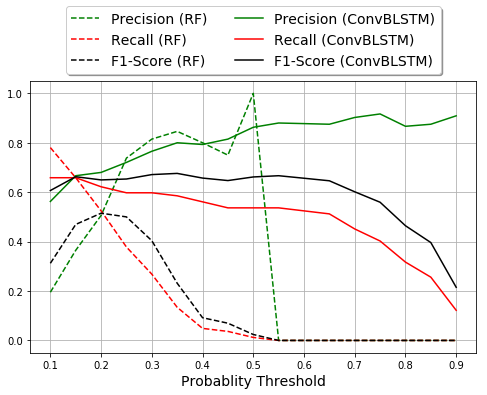

In [20]:
proba_off_on = 'proba'
assert proba_off_on in ['proba', 'off', 'on']

res_rf, res_our = np.array(res_rf), np.array(res_our)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)  

r = res_rf
ax.plot(r[:,0], r[:,1], label='Precision (RF)', color='green', linestyle='--')
ax.plot(r[:,0], r[:,2], label='Recall (RF)', color='red', linestyle='--')
ax.plot(r[:,0], r[:,3], label='F1-Score (RF)', color='black', linestyle='--')

r = res_our
ax.plot(r[:,0], r[:,1], label='Precision (ConvBLSTM)', color='green')
ax.plot(r[:,0], r[:,2], label='Recall (ConvBLSTM)', color='red')
ax.plot(r[:,0], r[:,3], label='F1-Score (ConvBLSTM)', color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=2, fancybox=True, shadow=True, fontsize=14)

plt.xlabel("Probablity Threshold", fontsize=14)        
#plt.ylabel("", fontsize=14)            
#plt.legend()
plt.grid(True)
plt.show() 

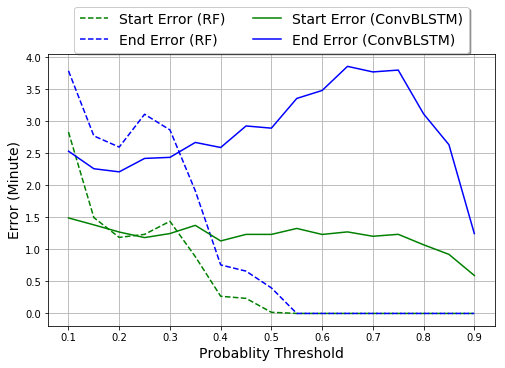

In [21]:
res_rf, res_our = np.array(res_rf), np.array(res_our)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)  

r = res_rf
ax.plot(r[:,0], r[:,4]/60, label='Start Error (RF)', color='green', linestyle='--')
ax.plot(r[:,0], r[:,5]/60, label='End Error (RF)', color='blue', linestyle='--')


r = res_our
ax.plot(r[:,0], r[:,4]/60, label='Start Error (ConvBLSTM)', color='green')
ax.plot(r[:,0], r[:,5]/60, label='End Error (ConvBLSTM)', color='blue')


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=2, fancybox=True, shadow=True, fontsize=14)

plt.xlabel("Probablity Threshold", fontsize=14)        
plt.ylabel("Error (Minute)", fontsize=14)            
#plt.legend()
plt.grid(True)
plt.show()

In [ ]:
importlib.reload(mmdu)
res_rf = []
res_our = []
for p in range(9800,10000, 2):
    percentile = p/100
    res = get_results(all_bf_percentile_rf[percentile]["bite_offline"]["list"])
    res_rf.append([percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"]])
    print(percentile, res["precision"], res["recall"], res["f1"], res["start_error"])
    
    res = get_results(all_bf_percentile_our[percentile]["bite_offline"]["list"])
    res_our.append([percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"]])
    print(percentile, res["precision"], res["recall"], res["f1"], res["start_error"], res["end_error"])